## I found two potential bugs, 
### 1. all libraries (numpy and math ) were not imported 
### 2. At line number 13, array[y,x,:]  shows an index error.  


In [1]:
def rotate(array, angle_in_degrees):
    
    import itertools
     # get the shape of an array and save it into the h, w 
    (h,w) = array.shape[:2]
    
    # make a zero numpy as the same size of an input 'array' 
    result = np.zeros_like(array).astype(np.uint8)
    
    # change the degree into the radian 
    angle = angle_in_degrees * math.pi / 180
    
    # now compute cos and sin values  
    (cosine, sine) = np.cos(angle), np.sin(angle)
    
    rotation_matrix = [[cosine, sine], [-sine, cosine]]
        
    for x,y in itertools.product(range(w), range(h)):
        pixels = array[y,x,:]                            # error line 
        new_x, new_y = np.matmul(rotation_matrix, [x,y])
        new_x, new_y = int(new_x), int(new_y)
        if 0 <= new_x < w and 0 <= new_y < h:
            result[new_y, new_x, :] = pixels            
            
    return result

In [8]:
import numpy as np 
import math
rotate(array = np.array([[1, 2], [3, 4]]), angle_in_degrees = 40)

IndexError: too many indices for array

## bug free version 
1. added two libraries: math, numpy 
2. i changed array[y,x,:] into the array[y,x] and result[new_y, new_x, :] to result[new_y, new_x]

In [430]:
def rotate(array, angle_in_degrees):
    import math 
    import numpy as np
    import itertools
     # get the shape of an array and save it into the h, w 
    (h,w) = array.shape[:2]
    
    # make a zero numpy as the same size of an input 'array' 
    result = np.zeros_like(array).astype(np.uint8)
    
    # change the degree into the radian 
    angle = angle_in_degrees * math.pi / 180
    
    # now compute cos and sin values  
    (cosine, sine) = np.cos(angle), np.sin(angle)
    
    rotation_matrix = [[cosine, sine], [-sine, cosine]]
        
    for x,y in itertools.product(range(w), range(h)):
        pixels = array[y,x]                            # error line 
        new_x, new_y = np.matmul(rotation_matrix, [x,y])
        new_x, new_y = int(new_x), int(new_y)
        if 0 <= new_x < w and 0 <= new_y < h:
            result[new_y, new_x] = pixels            
            
    return result

In [432]:
rotate(array = np.array([[1, 2], [3, 4]]), angle_in_degrees = 0)

array([[1, 2],
       [3, 4]], dtype=uint8)

## As an improvement I have added the visualization feature with this function 
**There is another input 'viz' (visualization), by default it's value is 'NO'.** 

If user enters the value as 'YES', then it visualizes the steps. 

In [427]:
def rotate(array, angle_in_degrees, viz = 'NO'):
    # initialize all the libraries 
    import math 
    import numpy as np
    import matplotlib.pyplot as plt
    import itertools
    # if viz is equal to 'YES' then this function will visualize the rotation steps.   
    if viz == 'YES':
        print('input array: ', array)
        plt.imshow(array)
        plt.title('input array')
        plt.colorbar()
        plt.show()
         # get the shape of an array and save it into the h, w 
        (h,w) = array.shape[:2]
        
        # initialize zeros matrix as the same size of an input 'array'. 
        # later we will fill this matrix.   
        result = np.zeros_like(array).astype(np.uint8)

        # change the degree into the radian 
        angle = angle_in_degrees * math.pi / 180

        # now compute cos and sine values  
        (cosine, sine) = np.cos(angle), np.sin(angle)

        # create a rotation matrix 
        rotation_matrix = [[cosine, sine], [-sine, cosine]]
        ## plotting 
        print('Rotation matrix: ', rotation_matrix)
        plt.imshow(rotation_matrix)
        plt.title('Rotation Matrix')
        plt.colorbar()
        plt.show()
        counter = 0 # initialize a counter to count the number of time loops 
        # create a for loop: this loop will h*w times  
        for x,y in itertools.product(range(w), range(h)):
            # save the first pixel of the array (ie. [0, 0]) to pixel
            pixels = array[y,x] 
            # multiply rotation matrix with (x,y) (multiply 2*2 with 2*1, resultant will be 2*1 array)
            new_x, new_y = np.matmul(rotation_matrix, [x,y])
            # convert the values into 
            new_x, new_y = int(new_x), int(new_y)
            if 0 <= new_x < w and 0 <= new_y < h:
                result[new_y, new_x] = pixels
                
                print('resultant matrix: ', result)
                plt.imshow(result)
                
                plt.title('Array at Step number: '+ str(counter))
                plt.colorbar()
                plt.show()
            counter +=1
        print('Final matrix: ', result)
        plt.imshow(result) 
        plt.title('Final Result')
        plt.colorbar()
        plt.show()
    else:
        # get the shape of an array and save it into the h, w 
        (h,w) = array.shape[:2]

        # make a zero numpy as the same size of an input 'array' 
        result = np.zeros_like(array).astype(np.uint8)

        # change the degree into the radian 
        angle = angle_in_degrees * math.pi / 180

        # now compute cos and sin values  
        (cosine, sine) = np.cos(angle), np.sin(angle)

        rotation_matrix = [[cosine, sine], [-sine, cosine]]

        for x,y in itertools.product(range(w), range(h)):
            pixels = array[y,x]                          
            new_x, new_y = np.matmul(rotation_matrix, [x,y])
            new_x, new_y = int(new_x), int(new_y)
            if 0 <= new_x < w and 0 <= new_y < h:
                result[new_y, new_x] = pixels            
    
    return result
    

## Result 

input array:  [[2.56763061 4.19495263 8.92368917]
 [6.84727649 7.12801081 6.08530846]]


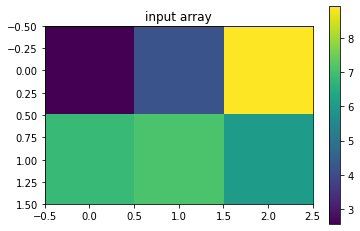

Rotation matrix:  [[0.7660444431189781, 0.6427876096865393], [-0.6427876096865393, 0.7660444431189781]]


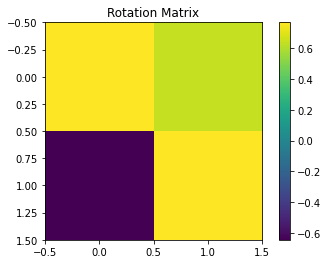

resultant matrix:  [[2 0 0]
 [0 0 0]]


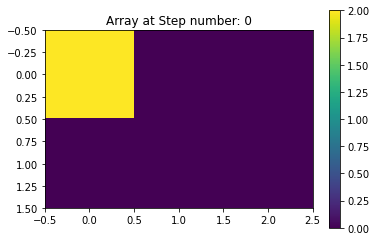

resultant matrix:  [[6 0 0]
 [0 0 0]]


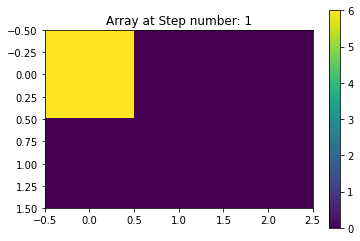

resultant matrix:  [[4 0 0]
 [0 0 0]]


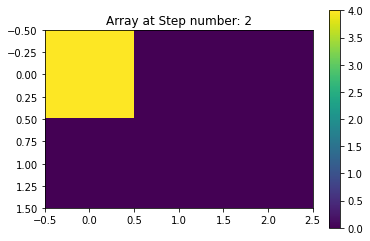

resultant matrix:  [[4 7 0]
 [0 0 0]]


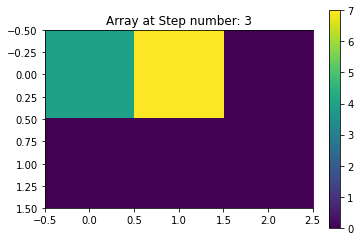

resultant matrix:  [[4 7 6]
 [0 0 0]]


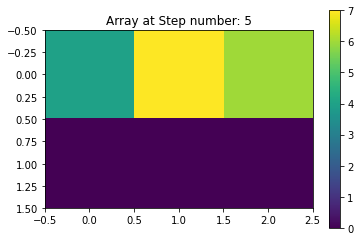

Final matrix:  [[4 7 6]
 [0 0 0]]


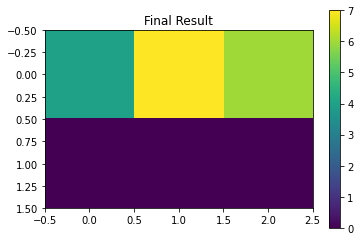

array([[4, 7, 6],
       [0, 0, 0]], dtype=uint8)

In [428]:

#rotate(array = np.array([[1, 2], [3, 4]]), angle_in_degrees = 40, viz = 'YES')
rotate(array = np.random.random((2,3))*10, angle_in_degrees = 40, viz = 'YES')

In [429]:
rotate(array = np.random.random((2,3))*10, angle_in_degrees = 40, viz = 'NO')

array([[5, 9, 5],
       [0, 0, 0]], dtype=uint8)